# **Bank Churn Prediction - Ravi Potlachervu**

--------------------
## **Context**
--------------------

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

----------------------
## **Objective**
----------------------

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

------------------------------
## **Data Dictionary**
------------------------------

- **CustomerId:** Unique ID which is assigned to each customer
- **Surname:** Last name of the customer 
- **CreditScore:** It defines the credit history of the customer.  
- **Geography:** A customer’s location    
- **Gender:** It defines the Gender of the customer   
- **Age:** Age of the customer     
- **Tenure:** Number of years for which the customer has been with the bank
- **NumOfProducts:** It refers to the number of products that a customer has - purchased through the bank.
- **Balance:** Account balance
- **HasCrCard**: It is a categorical variable that decides whether the customer has a credit card or not.
- **EstimatedSalary:** Estimated salary 
- **isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- **Exited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )


## **Loading the libraries and the dataset**

In [6]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#reading dataset
data = pd.read_csv('/content/drive/My Drive/DL/Churn.csv')

In [13]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


### Understand the shape of the dataset.

In [14]:
data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns.
* RowNumber, CustomerId, Surname columns add no value on data analysis, therefore we will drop these columns
* We will scale the numerical datasets to remove bias.


In [15]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [16]:
# dropping the serial no and customer key columns as they does not provide any information
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* There are no null values.
* 2 columns are of object type rest all are numerical.

In [18]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values.

In [ ]:
# checking for missing values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
#Based on analysis define numerial and categorical variables.
num_col = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_col=['HasCrCard', 'IsActiveMember','Geography', 'Gender','Exited']

### Summary of the dataset.

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


#### Observations:
* CreditScore: Mean credit score of customers is around 650 with min 350 and max 850.
* Geography: Majority of customers are from  France.
* Gender: Majority of customers are Male.
* Tenure:  Average numbers of years customers stayed with bank is around 5yrs min 3yrs and max 10yrs.
* Age: Average age of customers is 38 years, age of customers has a wide range from 18 to 92 years.
* Balance: On average the customer balances about 76K with max of 250K
* EstimatedSalary:  Average salary of customers is around 100K with min 51K and max around 200K

In [25]:
for i in cat_col:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in HasCrCard are :
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
Unique values in IsActiveMember are :
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
Unique values in Exited are :
0    7963
1    2037
Name: Exited, dtype: int64
**************************************************


**Observations**
* Most of the records are for existing customers.
* Most of the bank's customers are male
* Most customers are from France.

In [ ]:
cat_col=['HasCrCard', 'IsActiveMember','Geography', 'Gender','Exited']

## **Exploratory Data Analysis**

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [29]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [31]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [32]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

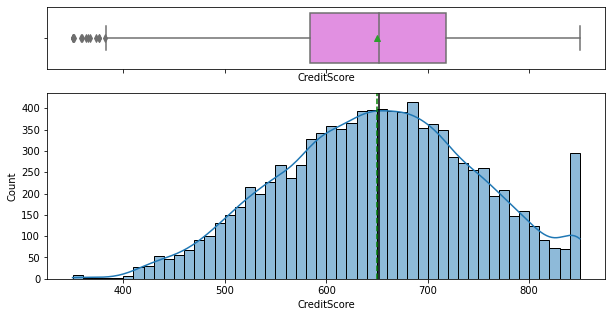

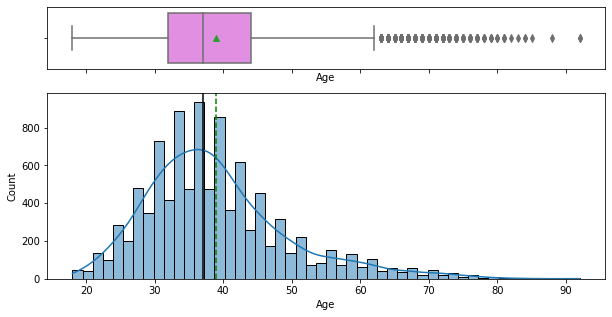

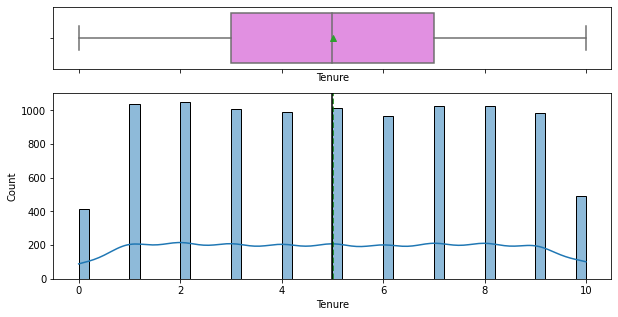

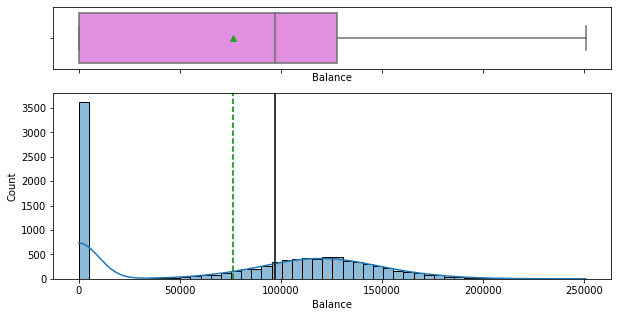

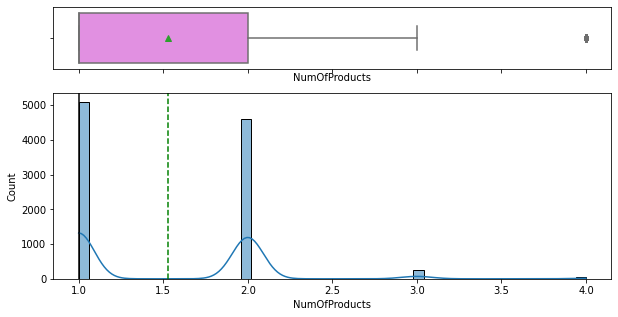

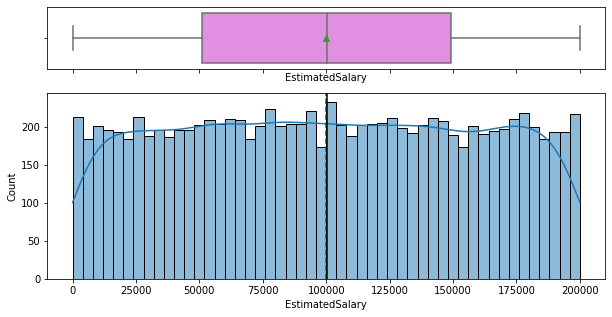

In [36]:
for item in num_col:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

**Observations**

- Variables like *Age*, *NumberofProduct*, *Balance*. are right-skewed and have upper outliers.
- *Tenure*,*EstimatedSalary* is symmetrically distributed.
- *CreditScore* is left-skewed.

### Bivariate Analysis

**Let's check for correlations.**

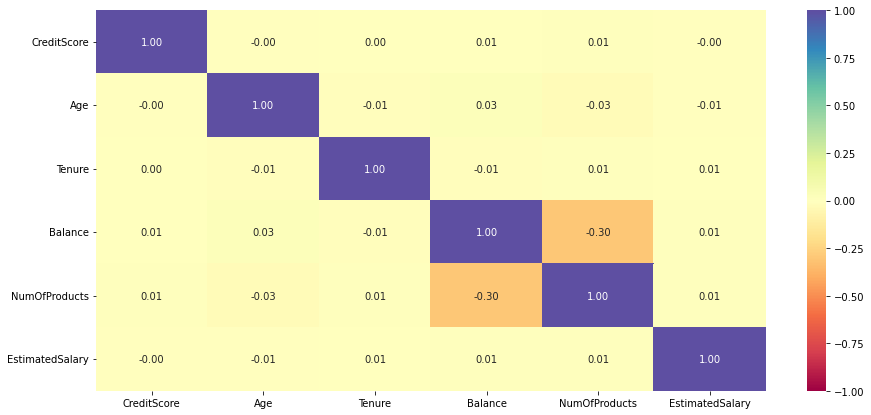

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- There is no significant correlation with numerical variables
- There is slight negative correlation between numbers of products and balance.

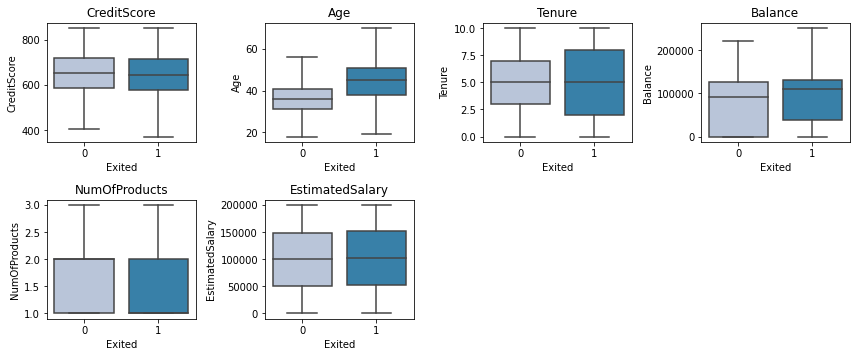

In [43]:
plt.figure(figsize=(12, 12))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(df["Exited"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations**

- There is no significance on CreditScore on Customers Churn.
- Customers above age 35 tends to exist the bank.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


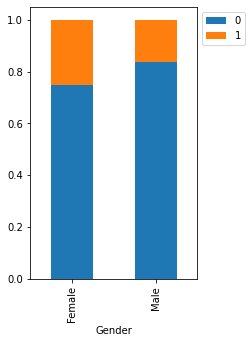

In [46]:
stacked_barplot(df, "Gender", "Exited")

* Female customers tends to leave bank more .

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


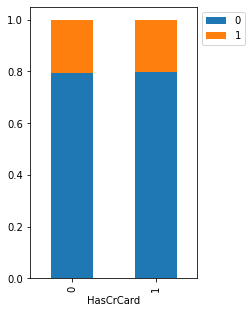

In [47]:
stacked_barplot(df, "HasCrCard", "Exited")

* No significance of customers have creditcard or not.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


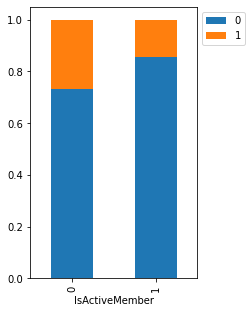

In [48]:
stacked_barplot(df, "IsActiveMember", "Exited")

* Non active customer tends to leave the bank.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


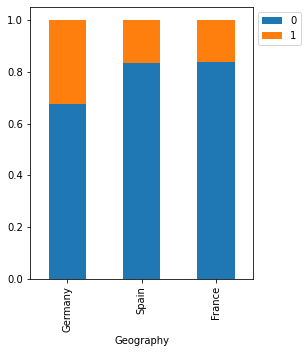

In [49]:
stacked_barplot(df, "Geography", "Exited")

* German customers are leaving bank more.

### Over EDA observations
* Provide more offer to Female customers  to female customers
* Offer location specific offers and improve customer experience.


###Data Pre-processing

In [50]:
##Splitting Independent and dependent variable in X and Y respectively
X = df.drop(['Exited'],axis=1)
Y = df[['Exited']]

print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [51]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.2, random_state=42)

In [52]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04


In [53]:
#Normalizing numerical variables
scale = StandardScaler()
X_train[num_col]=scale.fit_transform(X_train[num_col])
X_test[num_col]=scale.fit_transform(X_test[num_col])
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,0.356500,France,Male,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670
1561,-0.203898,Germany,Male,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254
1670,-0.961472,Spain,Male,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807
6087,-0.940717,France,Female,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393
6669,-1.397337,France,Male,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600


**Categorical Encoding**

In [54]:
## Storing required categorical variables in cat_data and drop target variable to apply dummification 
cat_data= ["Geography",'Gender','HasCrCard','IsActiveMember']

In [55]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)

In [56]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1.367670,0,0,1,1,1
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1.661254,1,0,1,1,1
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,-0.252807,0,1,1,1,0
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.915393,0,0,0,1,0
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.059600,0,0,1,0,0


In [57]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000, 1)
(2000, 11)
(2000, 1)


## **Model Building**

In [59]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

**Let's build a feed forward neural network with 2 hidden layers and the output layer.**

In [61]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of customers churn the bank  
model_1.add(Dense(1, activation='sigmoid'))

Since this is a binary classification task, we will be minimizing the binary_crossentropy and we can choose one optimizer out of

SGD
RMSprop
Adam

This is a hyper-parameter. You can play around with these optimizers to check which one performs better with a particular data.

For now, let's try **SGD** optimizer with **accuracy** as the metric and see the model's summary.

In [63]:
# Compliling the model with binary crossentropy as loss, SGD as optimizer and accuracy as metrics
model_1.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
# Printing the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


From the above summary, we can see that this architecture will train a total of **9,857** parameters i.e. weights and biases in the network.

### **Training the model**

Let's now train the model using the below piece of code. We will keep the 10% of the training data for validation.

In [64]:
history_1 = model_1.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
225/225 - 3s - loss: 0.5280 - accuracy: 0.7897 - val_loss: 0.4710 - val_accuracy: 0.8037 - 3s/epoch - 14ms/step
Epoch 2/150
225/225 - 0s - loss: 0.4787 - accuracy: 0.7933 - val_loss: 0.4447 - val_accuracy: 0.8037 - 466ms/epoch - 2ms/step
Epoch 3/150
225/225 - 0s - loss: 0.4597 - accuracy: 0.7946 - val_loss: 0.4283 - val_accuracy: 0.8050 - 480ms/epoch - 2ms/step
Epoch 4/150
225/225 - 0s - loss: 0.4469 - accuracy: 0.7953 - val_loss: 0.4177 - val_accuracy: 0.8112 - 479ms/epoch - 2ms/step
Epoch 5/150
225/225 - 0s - loss: 0.4424 - accuracy: 0.7954 - val_loss: 0.4095 - val_accuracy: 0.8188 - 471ms/epoch - 2ms/step
Epoch 6/150
225/225 - 0s - loss: 0.4334 - accuracy: 0.8035 - val_loss: 0.4033 - val_accuracy: 0.8300 - 474ms/epoch - 2ms/step
Epoch 7/150
225/225 - 0s - loss: 0.4262 - accuracy: 0.8076 - val_loss: 0.3969 - val_accuracy: 0.8375 - 474ms/epoch - 2ms/step
Epoch 8/150
225/225 - 0s - loss: 0.4190 - accuracy: 0.8169 - val_loss: 0.3917 - val_accuracy: 0.8413 - 488ms/epoch - 2ms

### **Plotting Accuracy vs Epoch Curve**

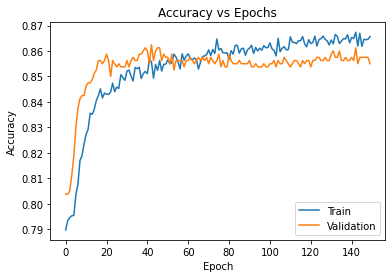

In [65]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in the epochs.
- The validation accuracy is consitent between ~60 to 140 epochs.
- The model is giving reasonable accuracy. the accuracy of the model on the training data is about 86% and the validation accuracy is about 85%.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.

Let's try to increase the model complexity by tuning some of the hyper-parameters mentioned earlier and check if we can improve the model performance. Out of all the options we have, let's try to change the number of hidden layers, the number of neurons in each hidden layer, the activation function in the hidden layer, and the optimizer from **SGD** to **adam**. Also, we have observed that validation accuracy became constant after some epochs, let's try less number of epochs which would also reduce the computation time. 

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [78]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [79]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [80]:
# We will be adding the layers sequentially
model_2 = Sequential()
# First hidden layer with 128 neurons and relu activation function, the input_shape tuple denotes number of independent variables
model_2.add(Dense(128, activation = 'relu', input_shape = (11, )))

# Second hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation = 'relu'))

# Second hidden layer with 32 neurons and relu activation function
model_2.add(Dense(32, activation = 'relu'))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of students getting admitted into UCLA  
model_2.add(Dense(1, activation = 'sigmoid'))

In [81]:
# Compliling the model with binary crossentropy as loss, Adam as optimizer and accuracy as metrics
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Printing the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [82]:
history_2 = model_2.fit(X_train, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=2)

Epoch 1/100
225/225 - 1s - loss: 0.4374 - accuracy: 0.8112 - val_loss: 0.3610 - val_accuracy: 0.8487 - 1s/epoch - 5ms/step
Epoch 2/100
225/225 - 0s - loss: 0.3598 - accuracy: 0.8479 - val_loss: 0.3436 - val_accuracy: 0.8600 - 482ms/epoch - 2ms/step
Epoch 3/100
225/225 - 0s - loss: 0.3442 - accuracy: 0.8581 - val_loss: 0.3516 - val_accuracy: 0.8587 - 495ms/epoch - 2ms/step
Epoch 4/100
225/225 - 1s - loss: 0.3380 - accuracy: 0.8628 - val_loss: 0.3350 - val_accuracy: 0.8537 - 507ms/epoch - 2ms/step
Epoch 5/100
225/225 - 0s - loss: 0.3326 - accuracy: 0.8646 - val_loss: 0.3378 - val_accuracy: 0.8537 - 490ms/epoch - 2ms/step
Epoch 6/100
225/225 - 0s - loss: 0.3313 - accuracy: 0.8636 - val_loss: 0.3366 - val_accuracy: 0.8537 - 485ms/epoch - 2ms/step
Epoch 7/100
225/225 - 0s - loss: 0.3262 - accuracy: 0.8679 - val_loss: 0.3338 - val_accuracy: 0.8575 - 477ms/epoch - 2ms/step
Epoch 8/100
225/225 - 0s - loss: 0.3245 - accuracy: 0.8676 - val_loss: 0.3349 - val_accuracy: 0.8587 - 481ms/epoch - 2ms/

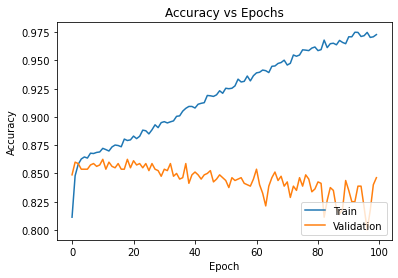

In [83]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:** 

- There is signification gap between Training and and validation accuracy values.
- Model is overfitting.

**Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.**

We will use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [85]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [86]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [91]:
# We will be adding the layers sequentially
model_3 = Sequential()
# First hidden layer with 128 neurons and relu activation function, the input_shape tuple denotes number of independent variables
model_3.add(Dense(128, activation = 'relu', input_shape = (11, )))

# Second hidden layer with 64 neurons and relu activation function
model_3.add(Dense(64, activation = 'relu'))

# Second hidden layer with 32 neurons and relu activation function
model_3.add(Dense(32, activation = 'relu'))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of students getting admitted into UCLA  
model_3.add(Dense(1, activation = 'sigmoid'))

In [92]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [93]:
history_3 = model_3.fit(X_train, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=200,
                    verbose=2)

Epoch 1/200
225/225 - 1s - loss: 0.4350 - accuracy: 0.8051 - val_loss: 0.3566 - val_accuracy: 0.8487 - 1s/epoch - 4ms/step
Epoch 2/200
225/225 - 0s - loss: 0.3590 - accuracy: 0.8504 - val_loss: 0.3405 - val_accuracy: 0.8575 - 490ms/epoch - 2ms/step
Epoch 3/200
225/225 - 1s - loss: 0.3481 - accuracy: 0.8543 - val_loss: 0.3502 - val_accuracy: 0.8600 - 501ms/epoch - 2ms/step
Epoch 4/200
225/225 - 1s - loss: 0.3414 - accuracy: 0.8612 - val_loss: 0.3310 - val_accuracy: 0.8600 - 504ms/epoch - 2ms/step
Epoch 5/200
225/225 - 0s - loss: 0.3360 - accuracy: 0.8649 - val_loss: 0.3360 - val_accuracy: 0.8587 - 481ms/epoch - 2ms/step
Epoch 6/200
225/225 - 0s - loss: 0.3331 - accuracy: 0.8635 - val_loss: 0.3299 - val_accuracy: 0.8512 - 499ms/epoch - 2ms/step
Epoch 7/200
225/225 - 0s - loss: 0.3286 - accuracy: 0.8671 - val_loss: 0.3289 - val_accuracy: 0.8587 - 477ms/epoch - 2ms/step
Epoch 8/200
225/225 - 1s - loss: 0.3264 - accuracy: 0.8646 - val_loss: 0.3288 - val_accuracy: 0.8587 - 516ms/epoch - 2ms/

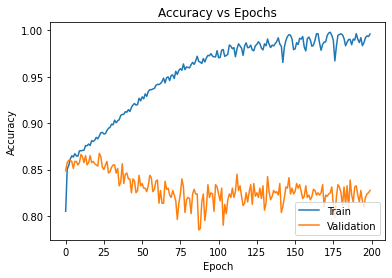

In [94]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- There is huge gap between training and Accuracy and model is becoming complex and overfitting.
-  We will use
 Model -1 to predict the test data.

### **Model evaluation on the test data**

In [95]:
model_3.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test))

63/63 [==============================] - 0s 1ms/step


The test accuracy is coming out to be 83% which implies that our model is able to replicate the performance from the train and validation data on the test data.

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1607
           1       0.57      0.54      0.56       393

    accuracy                           0.83      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.83      0.83      0.83      2000



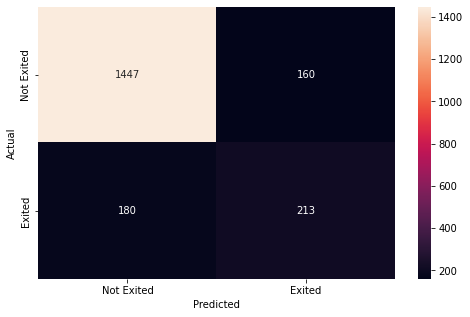

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

- The confusion matrix shows that the model can identify the majority of customers who left the bank and who didn't left the bank .
- The classification report shows f1 score for class 1 are above 80%, which is good.

## **Conclusion:**

In this case study, 
- Using Tensorflow and Keras with built  feed forward neural network to predict customers churn from bank. 
- We tried different Hyper parameters and how they affect the network. 
- We ploted the accuracy vs. epoch curve and shown how models performed.
- We were able to get the test accuracy of 83% using the final model.
